# Import

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

from sklearn import set_config
set_config(display='diagram')

### THU THẬP DỮ LIỆU TỪ TRANG WEB IMDB BẰNG CÁCH PARSE HTML

In [2]:
page = 1
movie_df = pd.DataFrame()
while True:
    url = 'https://www.imdb.com/search/title/?groups=top_1000&count=100&start='+ str(page)+'&ref_=adv_nxt'
    data_page = requests.get(url,headers={"Accept-Language": "en-US"})
    print(url)
    titles = []
    year = []
    certificates = []
    ratings = []
    genres = []
    votes =[]
    metascores = []
    runtime_list = []
    directors_list = []
    stars_list = []
    grosses_list =[]
    introduction_list = []
    produce_year_list = []
    soup = BeautifulSoup(data_page.text)
    list_item_content = soup.findAll('div',class_ = 'lister-item-content')
    print(len(list_item_content))
    for movie_content in list_item_content:
        list_muted_text = movie_content.findAll('p',class_='text-muted')
        introduction_list.append(list_muted_text[1].text.replace("\n ",""))
        item_header = movie_content.find('h3',class_='lister-item-header')
        title = item_header.find('a')
        rating = movie_content.find('strong')
        certificate = movie_content.find('span',class_ = 'certificate')
        vote = movie_content.find('p',class_ ='sort-num_votes-visible')
        genre = movie_content.find('span',class_='genre')
        metascore = movie_content.find('span',class_='metascore favorable')
        runtime = movie_content.find('span',class_='runtime')
        p_content = movie_content.find('p',class_='')
        produce_year = movie_content.find('span',class_='lister-item-year')
        produce_year = produce_year.text.replace("(","")
        produce_year = produce_year.replace(")","")
        produce_year_list.append(produce_year)
        if p_content != None:
            p_content_split = p_content.text.split('|')
            directors = p_content_split[0].replace("\n","")
            directors = directors.replace("Director:","")
            directors = directors.replace("Directors:","")
            stars = p_content_split[1].replace("\n","")
            stars = stars.replace("Stars:","")
            stars_list.append(stars)
            directors_list.append(directors)
        else:
            directors_list.append(None)
            stars_list.append(None)
        if certificate != None:
            certificates.append(certificate.text.strip())
        else:
            certificates.append(certificate)
        if "|" in vote.text:
            vote_gross = vote.text.split("|")
            vote_value = vote_gross[0]
            vote_value = vote_value.replace("\n","")
            vote_value = vote_value.replace(",","")
            vote_value = vote_value.replace("Votes:","")
            gross_value = vote_gross[1]
            gross_value = gross_value.replace("\n","")
            gross_value = gross_value.replace("Gross:","")
            gross_value = gross_value.replace("$","")
            gross_value = gross_value.replace("M","")
            gross_value = gross_value.replace(" ","")
            votes.append(vote_value)
            grosses_list.append(gross_value)
        else:
            vote_value = vote.text.replace("\n","")
            vote_value = vote_value.replace("Votes:","")
            vote_value = vote_value.replace(",","")
            votes.append(vote_value)
            grosses_list.append(None)
        if rating != None:
            ratings.append(rating.text.strip())
        else:
            ratings.append(rating)
        if title != None:
            titles.append(title.text.strip())
        else:
            titles.append(title)
        if genre != None:
            genres_text = genre.text.replace(" ","")
            genres_text = genres_text.strip()
            genres.append(genres_text)
        else:
            genres.append(genre)
        if metascore != None:
            metascores.append(metascore.text.strip())
        else:
            metascores.append(metascore)
        if runtime != None:
            runtime_text = runtime.text.strip()
            runtime_text = runtime_text.replace(" min","")
            runtime_list.append(runtime_text)
        else:
            runtime_list.append(runtime)

#     print(len(titles))
#     print(len(certificates))
#     print(len(ratings))
#     print(len(votes))
#     print(len(runtime_list))
#     print(genres)
#     print(len(metascores))
#     print(len(grosses_list))
    df = pd.DataFrame({'runtime':runtime_list,
                       'genres':genres,
                       'titles':titles,
                       'certificates':certificates,
                       'votes':votes,
                       'metascores':metascores,
                       'ratings':ratings,
                       'directors':directors_list,
                       'stars':stars_list,
                       "Gross":grosses_list,
                      'introduction':introduction_list,
                      'produce_year':produce_year_list})
    movie_df = movie_df.append(df)
    page = page + 100
    if page > 1000:
        break

https://www.imdb.com/search/title/?groups=top_1000&count=100&start=1&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=101&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=201&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=301&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=401&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=501&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=601&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=701&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=801&ref_=adv_nxt
100
https://www.imdb.com/search/title/?groups=top_1000&count=100&start=901&ref_=adv_nxt
100


In [3]:
movie_df.head()

,runtime,genres,titles,certificates,votes,metascores,ratings,directors,stars,Gross,introduction,produce_year
0,100,"Animation,Adventure,Comedy",Soul,PG,124386,83,8.1,"Pete Docter, Kemp Powers","Jamie Foxx, Tina Fey, Graham Norton, Rach...",None,A musician who has lost his passion for mus...,2020
1,117,"Comedy,Drama",Another Round,Not Rated,25551,81,7.8,Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Magnus ...",None,"Four friends, all high school teachers, tes...",2020
2,181,"Action,Adventure,Drama",Avengers: Endgame,PG-13,799583,78,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruff...",858.37,After the devastating events of Avengers: I...,2019
3,113,"Action,Comedy,Crime",The Gentlemen,R,229680,None,7.8,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Mich...",None,An American expat tries to sell off his hig...,2019
4,132,"Comedy,Drama,Thriller",Parasite,R,540288,96,8.6,Bong Joon Ho,"Song Kang-Ho, Lee Sun-kyun, Cho Yeo-jeong...",53.37,Greed and class discrimination threaten the...,2019


In [4]:
movie_df.to_csv("movie_IDMB.csv",encoding="utf-8",index=False)

In [5]:
movie_df.isna().sum()

runtime           0
genres            0
titles            0
certificates     11
votes             0
metascores      230
ratings           0
directors         0
stars             0
Gross           168
introduction      0
produce_year      0
dtype: int64

In [6]:
movie_df.describe()

,runtime,genres,titles,certificates,votes,metascores,ratings,directors,stars,Gross,introduction,produce_year
count,1000,1000,1000,989,1000,770,1000,1000,1000,832,1000,1000
unique,138,202,997,14,998,40,17,566,998,733,1000,115
top,129,Drama,Drishyam,R,29583,76,7.7,Alfred Hitchcock,"Daniel Radcliffe, Emma Watson, Rupert Gri...",0.01,A college professor bonds with an abandoned...,2004
freq,22,86,2,381,2,32,156,14,2,8,1,29


In [7]:
df = pd.read_csv("movie_IDMB.csv")

### Kiểu dữ liệu của mỗi cột

In [8]:
df.dtypes

runtime           int64
genres           object
titles           object
certificates     object
votes             int64
metascores      float64
ratings         float64
directors        object
stars            object
Gross           float64
introduction     object
produce_year     object
dtype: object

## Khám phá dữ liệu

#### Ở đây ta có các 2 loại cột là các cột numeric (int64, float64) và cột categorical (object)
   Với cột dạng categorical ta tính các giá trị bao gồm tỉ lệ thiếu dữ liệu, số giá trị của các cột và tỉ lệ của các giá trị này trong toàn bộ cột.
   
   Với cột dạng numeric bao gồm runtime, votes, metascores, ratings, Gross ta tính các giá trị bao gồm tỉ lệ thiếu dữ liệu giá trị nhỏ nhất, giá trị lớn nhất, các giá trị phân vị 25, 50, 75.

In [9]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
multichoices_cat_cols = ["genres","directors","stars"]
num_cols = ["runtime","votes","metascores","ratings","Gross"]
cat_movie_df = df.select_dtypes(include="object")
cat_col_info_df = pd.DataFrame()
# Tính phần trăm dữ liệu bị thiếu của các cột
series_missing_ratio = pd.Series((cat_movie_df.isna().sum()/len(cat_movie_df) * 100),name="missing_ratio")
# Khởi tạo dictionary cho việc đếm giá trị tại các cột
num_choices = dict()
# Khởi tạo dictionary cho việc đếm phần trăm mỗi giá trị tại các cột
values_columns_ratio = dict()
for column in cat_movie_df.columns:
    if column in multichoices_cat_cols:   # Xét xem column có thuộc multichoice_cat_cols không
        new_df = pd.DataFrame(cat_movie_df[column]).dropna()
        new_df[column] = new_df[column].str.split(',') 
      # Đổi giá trị của dòng đó sang list của chuỗi được split
        new_df1 = new_df.explode(column)    # dùng explode để giải phóng các list trong từng dòng
        # Tính phần trăm các giá trị dựa vào value_counts
        values_ratio = dict((new_df1[column].value_counts(normalize=True)*100).round(1))
        list_values= list(values_ratio.keys())
    else:
        # Tính phần trăm các giá trị dựa vào value_counts
        values_ratio = dict((df[column].value_counts(normalize=True)*100).round(1))
        list_values= list(values_ratio.keys())
    values_columns_ratio[column] = dict(sorted(values_ratio.items(), key=lambda x:x[1],reverse = True))
    num_choices[column] = len(list_values)
# Thêm các series tương ứng vào cat_col_info_df
cat_col_info_df= cat_col_info_df.append(series_missing_ratio)
cat_col_info_df= cat_col_info_df.append(pd.Series(num_choices,name ="num_values"))
cat_col_info_df= cat_col_info_df.append(pd.Series(values_columns_ratio,name = "value_ratios"))
cat_col_info_df

,certificates,directors,genres,introduction,produce_year,stars,titles
missing_ratio,1.1,0,0,0,0,0,0
num_values,14,642,21,1000,115,2962,997
value_ratios,"{'R': 38.5, 'Not Rated': 17.2, 'PG-13': 17.0, 'PG': 14.4, 'G': 4.6, 'Passed': 3.9, 'Approved': 2...","{' Alfred Hitchcock': 1.3, ' Steven Spielberg': 1.3, ' Hayao Miyazaki': 1.0, ' Marti...","{'Drama': 28.4, 'Comedy': 9.2, 'Crime': 8.2, 'Adventure': 7.8, 'Action': 7.5, 'Thriller': 5.4, '...","{' A college professor bonds with an abandoned dog he takes into his home.': 0.1, ' A poor v...","{'2004': 2.9, '2009': 2.9, '2014': 2.8, '2006': 2.6, '2013': 2.6, '2001': 2.6, '2016': 2.4, '200...","{' Tom Hanks': 0.3, ' Robert De Niro': 0.3, ' Clint Eastwood': 0.2, ' Al Pacino'...","{'Drishyam': 0.2, 'The Girl with the Dragon Tattoo': 0.2, 'Scarface': 0.2, 'The Lion in Winter':..."


In [10]:
cat_col_info_df['produce_year']['value_ratios']

{'2004': 2.9,
 '2009': 2.9,
 '2014': 2.8,
 '2006': 2.6,
 '2013': 2.6,
 '2001': 2.6,
 '2016': 2.4,
 '2007': 2.4,
 '2012': 2.4,
 '2019': 2.2,
 '2003': 2.2,
 '1993': 2.2,
 '2010': 2.1,
 '2008': 2.0,
 '1997': 1.9,
 '2002': 1.9,
 '1995': 1.9,
 '2015': 1.9,
 '2000': 1.9,
 '2018': 1.8,
 '2017': 1.8,
 '1998': 1.7,
 '1999': 1.7,
 '2005': 1.7,
 '2011': 1.6,
 '1962': 1.3,
 '1994': 1.3,
 '1991': 1.2,
 '1973': 1.2,
 '1987': 1.2,
 '1979': 1.2,
 '1992': 1.2,
 '1989': 1.1,
 '1982': 1.1,
 '1960': 1.1,
 '1988': 1.1,
 '1984': 1.0,
 '1967': 1.0,
 '1996': 1.0,
 '1986': 1.0,
 '1975': 0.9,
 '1957': 0.9,
 '1985': 0.9,
 '1971': 0.9,
 '1968': 0.8,
 '1972': 0.8,
 '1990': 0.8,
 '1980': 0.8,
 '1966': 0.7,
 '1959': 0.7,
 '1976': 0.7,
 '1964': 0.7,
 '1978': 0.7,
 '1940': 0.7,
 '2020': 0.6,
 '1954': 0.6,
 '1948': 0.6,
 '1974': 0.6,
 '1955': 0.6,
 '1956': 0.5,
 '1963': 0.5,
 '1944': 0.5,
 '1951': 0.5,
 '1983': 0.5,
 '1950': 0.5,
 '1953': 0.5,
 '1939': 0.5,
 '1961': 0.5,
 '1946': 0.5,
 '1965': 0.4,
 '1958': 0.4,
 '1981

In [11]:
df[num_cols].describe()

,runtime,votes,metascores,ratings,Gross
count,1000.000000,1.000000e+03,770.000000,1000.000000,832.000000
mean,122.648000,2.733289e+05,80.325974,7.948500,68.471839
std,27.913783,3.258655e+05,9.827060,0.276467,109.765852
min,45.000000,2.516100e+04,61.000000,7.600000,0.000000
25%,102.000000,5.641375e+04,73.000000,7.700000,3.325000
50%,119.000000,1.381420e+05,80.000000,7.900000,24.265000
75%,136.000000,3.722345e+05,88.000000,8.100000,82.567500
max,321.000000,2.333043e+06,100.000000,9.300000,936.660000


In [12]:
numeric_df =df[num_cols]
type(df.quantile(0.5))
list_num_info = []
list_num_info.append((numeric_df.isna().mean()*100).round(1))
list_num_info.append(numeric_df.min())
list_num_info.append(numeric_df.quantile(0.25))
list_num_info.append(numeric_df.quantile(0.5))
list_num_info.append(numeric_df.quantile(0.75))
list_num_info.append(numeric_df.max())
num_col_info_df = pd.DataFrame(list_num_info,index=['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
num_col_info_df

,runtime,votes,metascores,ratings,Gross
missing_ratio,0.0,0.00,23.0,0.0,16.8000
min,45.0,25161.00,61.0,7.6,0.0000
lower_quartile,102.0,56413.75,73.0,7.7,3.3250
median,119.0,138142.00,80.0,7.9,24.2650
upper_quartile,136.0,372234.50,88.0,8.1,82.5675
max,321.0,2333043.00,100.0,9.3,936.6600


### Trực quan hóa độ tương quan của các thuộc tính của các cột numeric

In [13]:
df.corr()

,runtime,votes,metascores,ratings,Gross
runtime,1.000000,0.180544,-0.027193,0.245173,0.139508
votes,0.180544,1.000000,-0.057817,0.493111,0.572761
metascores,-0.027193,-0.057817,1.000000,0.250108,-0.081401
ratings,0.245173,0.493111,0.250108,1.000000,0.094311
Gross,0.139508,0.572761,-0.081401,0.094311,1.000000


<AxesSubplot:>

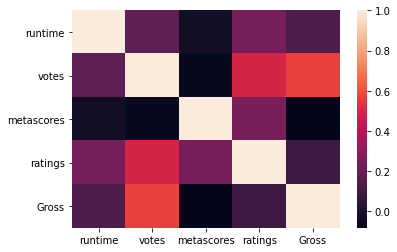

In [14]:
sns.heatmap(df.corr())

In [15]:
df

,runtime,genres,titles,certificates,votes,metascores,ratings,directors,stars,Gross,introduction,produce_year
0,100,"Animation,Adventure,Comedy",Soul,PG,124386,83.0,8.1,"Pete Docter, Kemp Powers","Jamie Foxx, Tina Fey, Graham Norton, Rachel House",NaN,A musician who has lost his passion for music is transported out of his body and must find hi...,2020
1,117,"Comedy,Drama",Another Round,Not Rated,25551,81.0,7.8,Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Magnus Millang, Lars Ranthe",NaN,"Four friends, all high school teachers, test a theory that they will improve their lives by m...",2020
2,181,"Action,Adventure,Drama",Avengers: Endgame,PG-13,799583,78.0,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth",858.37,"After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With...",2019
3,113,"Action,Comedy,Crime",The Gentlemen,R,229680,NaN,7.8,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle Dockery, Jeremy Strong",NaN,"An American expat tries to sell off his highly profitable marijuana empire in London, trigger...",2019
4,132,"Comedy,Drama,Thriller",Parasite,R,540288,96.0,8.6,Bong Joon Ho,"Song Kang-Ho, Lee Sun-kyun, Cho Yeo-jeong, Choi Woo-sik",53.37,Greed and class discrimination threaten the newly formed symbiotic relationship between the w...,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,"Drama,Family,Sport",Chak De! India,Not Rated,73808,68.0,8.2,Shimit Amin,"Shah Rukh Khan, Vidya Malvade, Sagarika Ghatge, Shilpa Shukla",1.11,Kabir Khan is the coach of the Indian Women's National Hockey Team and his dream is to make h...,2007
996,186,"Biography,Drama,Sport",Bhaag Milkha Bhaag,Not Rated,60931,NaN,8.2,Rakeysh Omprakash Mehra,"Farhan Akhtar, Sonam Kapoor, Pawan Malhotra, Art Malik",1.63,The truth behind the ascension of Milkha Singh who was scarred because of the India-Pakistan ...,2013
997,126,"Comedy,Romance",Vicky Donor,Not Rated,39596,NaN,7.8,Shoojit Sircar,"Ayushmann Khurrana, Yami Gautam, Annu Kapoor, Dolly Ahluwalia",0.17,"A man is brought in by an infertility doctor to supply him with his sperm, where he becomes t...",2012
998,144,"Comedy,Drama,Romance",Lage Raho Munna Bhai,PG-13,42993,NaN,8.0,Rajkumar Hirani,"Sanjay Dutt, Arshad Warsi, Vidya Balan, Boman Irani",2.22,Munna Bhai embarks on a journey with Mahatma Gandhi in order to fight against a corrupt prope...,2006


In [16]:
df.genres.value_counts()

Drama                       86
Drama,Romance               35
Comedy,Drama                34
Action,Crime,Drama          31
Comedy,Drama,Romance        31
                            ..
Drama,Musical                1
Biography,Drama,War          1
Comedy,Drama,Sci-Fi          1
Action,Adventure,Romance     1
Comedy,Family,Romance        1
Name: genres, Length: 202, dtype: int64

### Đặt câu hỏi và trả lời câu hỏi

Các bộ phim nào đạt rating cao nhất mỗi năm ?

In [17]:
df.produce_year.value_counts()

2004        29
2009        29
2014        28
2006        26
2013        26
            ..
1936         1
I 2001       1
1943         1
I 2016       1
III 2016     1
Name: produce_year, Length: 115, dtype: int64

In [18]:
ratings_df = df[["ratings","produce_year"]]

In [19]:
produce_year_group = ratings_df.groupby("produce_year")

In [20]:
max_rating_idx = produce_year_group.max().reset_index().index

In [21]:
df.iloc[max_rating_idx]

,runtime,genres,titles,certificates,votes,metascores,ratings,directors,stars,Gross,introduction,produce_year
0,100,"Animation,Adventure,Comedy",Soul,PG,124386,83.0,8.1,"Pete Docter, Kemp Powers","Jamie Foxx, Tina Fey, Graham Norton, Rachel House",NaN,A musician who has lost his passion for music is transported out of his body and must find hi...,2020
1,117,"Comedy,Drama",Another Round,Not Rated,25551,81.0,7.8,Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Magnus Millang, Lars Ranthe",NaN,"Four friends, all high school teachers, test a theory that they will improve their lives by m...",2020
2,181,"Action,Adventure,Drama",Avengers: Endgame,PG-13,799583,78.0,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth",858.37,"After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With...",2019
3,113,"Action,Comedy,Crime",The Gentlemen,R,229680,NaN,7.8,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle Dockery, Jeremy Strong",NaN,"An American expat tries to sell off his highly profitable marijuana empire in London, trigger...",2019
4,132,"Comedy,Drama,Thriller",Parasite,R,540288,96.0,8.6,Bong Joon Ho,"Song Kang-Ho, Lee Sun-kyun, Cho Yeo-jeong, Choi Woo-sik",53.37,Greed and class discrimination threaten the newly formed symbiotic relationship between the w...,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
110,119,"Action,Adventure,Comedy",Deadpool 2,R,476072,66.0,7.7,David Leitch,"Ryan Reynolds, Josh Brolin, Morena Baccarin, Julian Dennison",324.59,"Foul-mouthed mutant mercenary Wade Wilson (a.k.a. Deadpool), brings together a team of fellow...",2018
111,125,"Animation,Adventure,Family",Spirited Away,PG,647583,96.0,8.6,Hayao Miyazaki,"Daveigh Chase, Suzanne Pleshette, Miyu Irino, Rumi Hiiragi",10.06,"During her family's move to the suburbs, a sullen 10-year-old girl wanders into a world ruled...",2001
112,88,"Animation,Adventure,Drama",The Lion King,G,938230,88.0,8.5,"Roger Allers, Rob Minkoff","Matthew Broderick, Jeremy Irons, James Earl Jones, Whoopi Goldberg",422.78,"Lion prince Simba and his father are targeted by his bitter uncle, who wants to ascend the th...",1994
113,118,"Drama,Thriller",Room,R,369151,86.0,8.1,Lenny Abrahamson,"Brie Larson, Jacob Tremblay, Sean Bridgers, Wendy Crewson",14.68,"Held captive for 7 years in an enclosed space, a woman and her young son finally gain their f...",I 2015


## Tiếp tục tiền xử lý và xây dựng mô hình

In [22]:
new_df1 = df

In [23]:
new_df1['genres'] = new_df1['genres'].str.split(',')
# Dùng onehot-encoder
df1 = new_df1['genres'].str.join('|').str.get_dummies()

In [24]:
new_df = df.join(df1)
new_df = new_df.drop(columns=["genres","titles","directors","stars","introduction","produce_year"],axis =1)

In [25]:
# Tách X và y
y_sr= new_df["ratings"] # sr là viết tắt của series
X_df = new_df.drop("ratings", axis=1)

In [26]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 80%:20%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.2, 
                                                                 random_state=0)

In [27]:
new_df.head()

,runtime,certificates,votes,metascores,ratings,Gross,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,100,PG,124386,83.0,8.1,NaN,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,117,Not Rated,25551,81.0,7.8,NaN,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,181,PG-13,799583,78.0,8.4,858.37,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,113,R,229680,NaN,7.8,NaN,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,132,R,540288,96.0,8.6,53.37,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
category_cols = ["certificates"]
num_cols = ["runtime","votes","metascores","Gross"]

SVC= SVC(gamma='scale')


num_cols_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

category_cols_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])


preprocess_col = ColumnTransformer(
    transformers=[
        ('num', num_cols_transformer, num_cols),
        ('cat',category_cols_transformer ,category_cols)],remainder='passthrough')

preprocess_pipeline=Pipeline(steps=[
    ('preprocess', preprocess_col),
    ('scaler', StandardScaler())])

full_pipeline=Pipeline(steps=[
    ('preprocess_pipeline', preprocess_pipeline),
    ('SVC', SVC)])
# full_pipeline

In [ ]:
param_grid = {
    'SVC__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'SVC__C': [0.001,0.01,0.1,1,10,100,1000]
}
search = GridSearchCV(full_pipeline, param_grid, cv=5)
search.fit(train_X_df, train_y_sr)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)